In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')
import seaborn as sns
import pandas as pd

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS_patient = df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형', '재발여부']]
df_ROS_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


### 전처리
- 대상 컬럼에 의한 레코드 삭제 시 데이터셋의 수 고려

In [9]:
# df_ROS_patient.isnull().sum()
df_ROS_patient = df_ROS_patient.dropna()
df_ROS_patient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관 관계 확인
- 목표변수: '재발여부' - 분포 언밸런스 (연속형은 정규화 확인, 범주형은 언밸런스 확인)
- 설명변수: '성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형' 

<Axes: xlabel='재발여부', ylabel='count'>

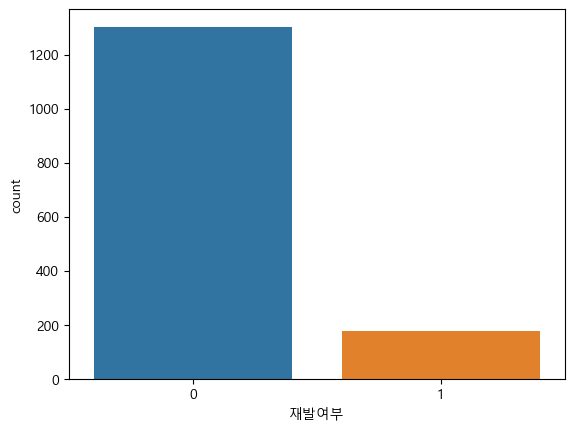

In [12]:
### 데이터 타입과 분포
# 범주형과 연속형
sns.countplot(data=df_ROS_patient, x='재발여부')

In [13]:
df_ROS_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [16]:
# Object 변환 대상: 성별, 심혈관질환, 흡연여부, (직업, 혈액형), 재발여부

In [17]:
# 심혈관질환 value 확인
df_ROS_patient['심혈관질환'].value_counts()

0    1423
1      56
Name: 심혈관질환, dtype: int64

In [22]:
df_ROS_patient[['성별', '심혈관질환', '흡연여부', '재발여부']] = df_ROS_patient[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object)
df_ROS_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [23]:
df_ROS_patient.describe()

,신장,체중,연령
count,1479.000000,1479.000000,1479.000000
mean,168.158891,68.243070,39.980392
std,9.250669,11.426661,13.314364
min,140.000000,35.000000,15.000000
25%,161.000000,60.000000,30.000000
50%,169.000000,67.800000,39.000000
75%,175.000000,75.150000,47.000000
max,204.000000,136.100000,86.000000


In [26]:
df_ROS_patient.describe().columns
patient_list = df_ROS_patient.describe().columns.to_list()
patient_list

['신장', '체중', '연령']

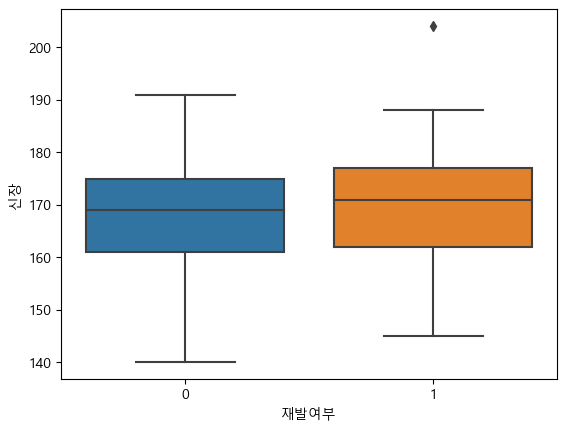

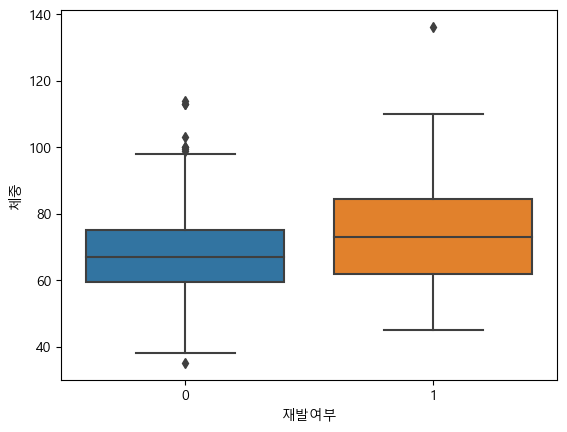

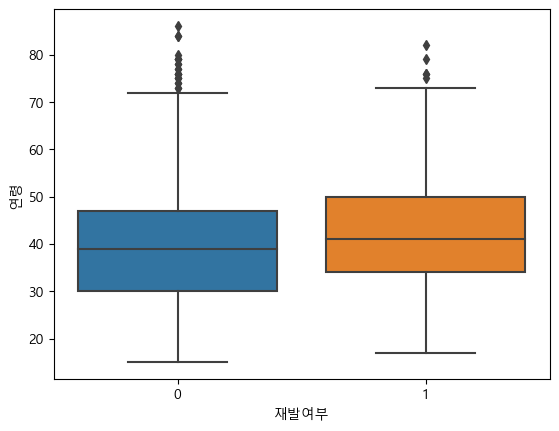

In [30]:
# x가 연속형이고 y가 범주형인 경우
for item in patient_list:
    sns.boxplot(data=df_ROS_patient, y= item, x= '재발여부')
    plt.show()

### 상관관계
- 신장: 상관관계 낮음 (분포 변화 작음)
- 체중: 상관관계 높음 (분포 변화 큼)
- 연령: 상관관계 존재 (분포 변화 존재)

In [34]:
# 범주형 & 범주형
df_ROS_patient.drop(columns=['재발여부'])
# df_ROS_patient.describe(include=object)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형
0,2,163,0,60.3,0,66,자영업,RH+A
1,1,171,0,71.7,0,47,운동선수,RH+A
2,1,178,0,77.1,0,39,특수전문직,RH+B
3,1,174,0,74.2,0,40,주부,RH+O
4,1,183,0,80.7,0,42,특수전문직,RH+A
...,...,...,...,...,...,...,...,...
1889,2,157,0,64.0,0,59,무직,RH+A
1890,2,157,0,59.0,0,42,사무직,RH+B
1891,1,167,0,70.0,0,61,무직,RH+O
1892,1,177,0,77.0,0,29,사무직,RH+A


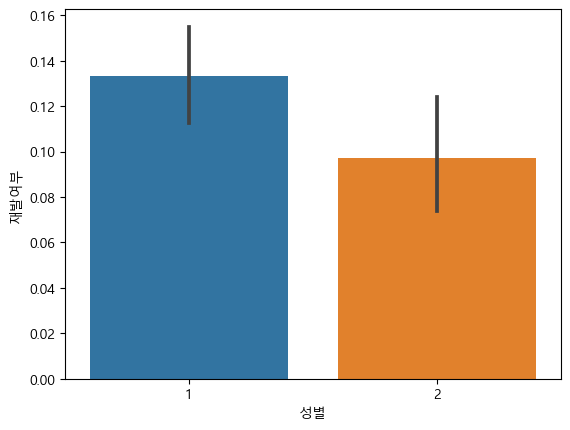

In [38]:
sns.barplot(data=df_ROS_patient, x='성별', y='재발여부')
plt.show()

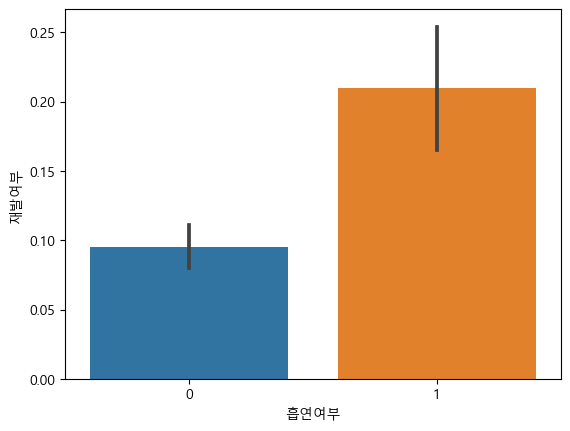

In [39]:
sns.barplot(data=df_ROS_patient, x='흡연여부', y='재발여부')
plt.show()

### 상관관계
- 성별: 상관관계 존재 (분포 변화 작음)
- 흡연여부: 상관관계 높음 (분포 변화 큼)

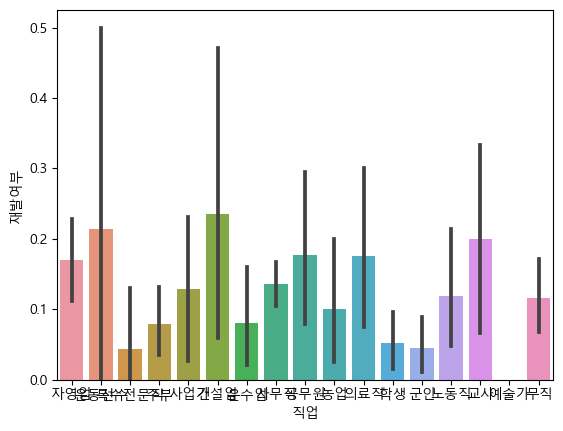

In [42]:
sns.barplot(data=df_ROS_patient, x='직업', y='재발여부')
plt.show()

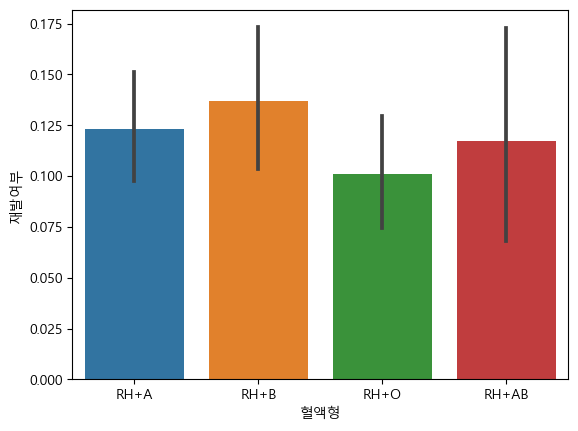

In [43]:
sns.barplot(data=df_ROS_patient, x='혈액형', y='재발여부')
plt.show()